In [2]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

In [1]:
import sqlite3
conn = sqlite3.connect("/Users/sanjaydilip/Downloads/m4_survey_data.sqlite") # open a database connection

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


In [4]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [10]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


In [11]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

In [34]:
QUERY = """
SELECT Count(*) FROM DevType where DevType='Developer, back-end'
"""
pd.read_sql_query(QUERY,conn)

,Count(*)
0,6290


In [28]:
QUERY = """
SELECT * FROM DevType
"""
pd.read_sql_query(QUERY,conn)


,Respondent,DevType
0,4,"Developer, full-stack"
1,9,Database administrator
2,9,"Developer, back-end"
3,9,"Developer, front-end"
4,9,"Developer, full-stack"
...,...,...
35309,25141,"Developer, mobile"
35310,25141,"Engineer, data"
35311,25141,"Engineer, site reliability"
35312,25141,System administrator


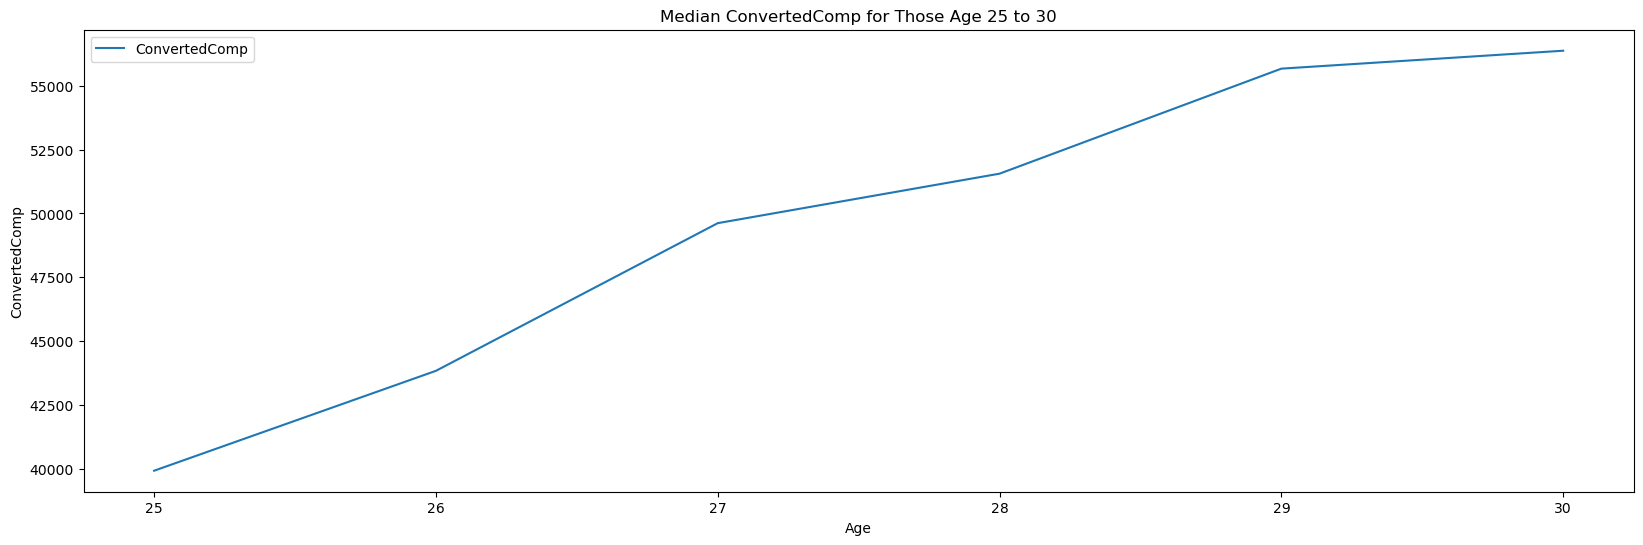

In [37]:
# your code goes here
QUERY = """
SELECT ConvertedComp, Age FROM master
WHERE Age BETWEEN 25 AND 30
"""
df = pd.read_sql_query(QUERY,conn)
df1 = df.groupby('Age').median()

df1.plot(kind='line', figsize=(20, 6))

plt.title('Median ConvertedComp for Those Age 25 to 30')
plt.ylabel('ConvertedComp')
plt.show()



In [12]:
QUERY = """
SELECT * FROM LanguageWorkedWith
"""
pd.read_sql_query(QUERY,conn)

,Respondent,LanguageWorkedWith
0,4,C
1,4,C++
2,4,C#
3,4,Python
4,4,SQL
...,...,...
59787,25142,Go
59788,25142,HTML/CSS
59789,25142,PHP
59790,25142,Python


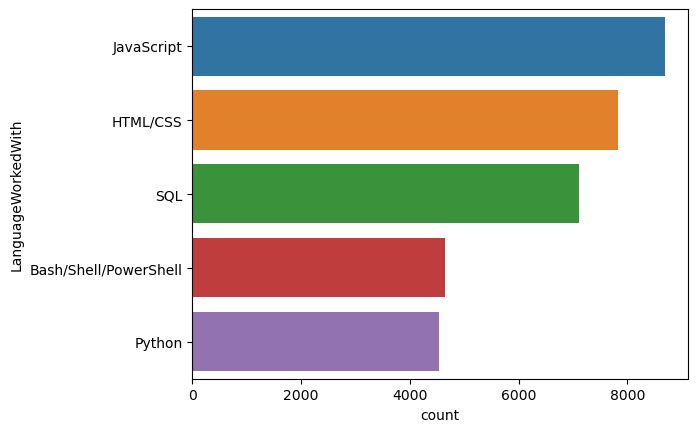

In [17]:
import seaborn as sns

QUERY = """
SELECT LanguageWorkedWith, Count(Respondent) as count FROM LanguageWorkedWith GROUP BY LanguageWorkedWith ORDER BY count DESC LIMIT 5
"""
df = pd.read_sql_query(QUERY,conn)
plot = sns.barplot(x='count', y='LanguageWorkedWith', data=df, orient='h')



In [26]:
QUERY = """
SELECT LanguageWorkedWith, Count(Respondent) as count FROM LanguageWorkedWith GROUP BY LanguageWorkedWith ORDER BY count
"""
pd.read_sql_query(QUERY,conn)

,LanguageWorkedWith,count
0,Erlang,98
1,WebAssembly,133
2,F#,158
3,Clojure,164
4,Elixir,187
5,Dart,237
6,Rust,324
7,Assembly,437
8,Scala,492
9,Objective-C,518


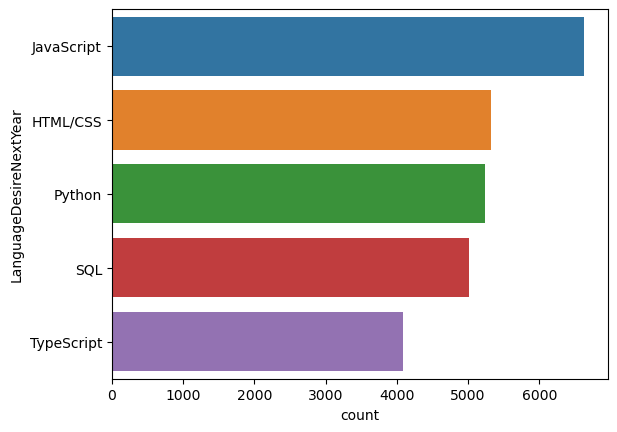

In [16]:
QUERY = """
SELECT LanguageDesireNextYear, Count(Respondent) as count FROM LanguageDesireNextYear GROUP BY LanguageDesireNextYear ORDER BY count DESC LIMIT 5
"""
df = pd.read_sql_query(QUERY,conn)
plot = sns.barplot(x='count', y='LanguageDesireNextYear', data=df, orient='h')

In [27]:
QUERY = """
SELECT LanguageDesireNextYear, Count(Respondent) as count FROM LanguageDesireNextYear GROUP BY LanguageDesireNextYear ORDER BY count
"""
pd.read_sql_query(QUERY,conn)

,LanguageDesireNextYear,count
0,VBA,149
1,Erlang,310
2,Objective-C,310
3,Assembly,336
4,Clojure,413
5,Dart,610
6,Elixir,620
7,F#,621
8,Other(s):,836
9,R,850


Close the database connection.


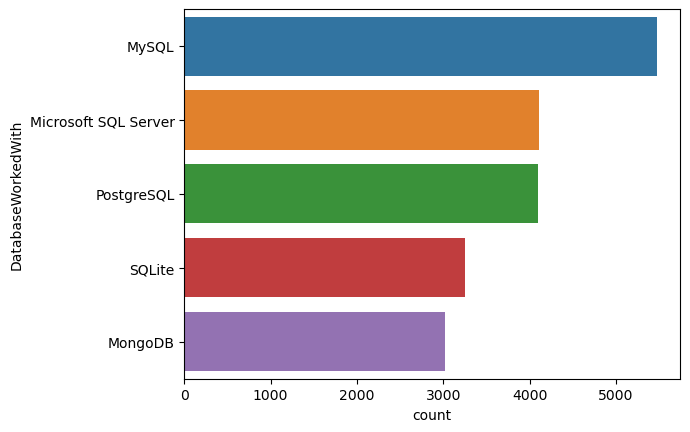

In [18]:
QUERY = """
SELECT DatabaseWorkedWith, Count(Respondent) as count FROM DatabaseWorkedWith GROUP BY DatabaseWorkedWith ORDER BY count DESC LIMIT 5
"""
df = pd.read_sql_query(QUERY,conn)
plot = sns.barplot(x='count', y='DatabaseWorkedWith', data=df, orient='h')

In [28]:
QUERY = """
SELECT DatabaseWorkedWith, Count(Respondent) as count FROM DatabaseWorkedWith GROUP BY DatabaseWorkedWith ORDER BY count
"""
pd.read_sql_query(QUERY,conn)

,DatabaseWorkedWith,count
0,Couchbase,250
1,Cassandra,397
2,Other(s):,728
3,DynamoDB,831
4,Firebase,1314
5,MariaDB,1709
6,Oracle,1744
7,Elasticsearch,1954
8,Redis,2508
9,MongoDB,3016


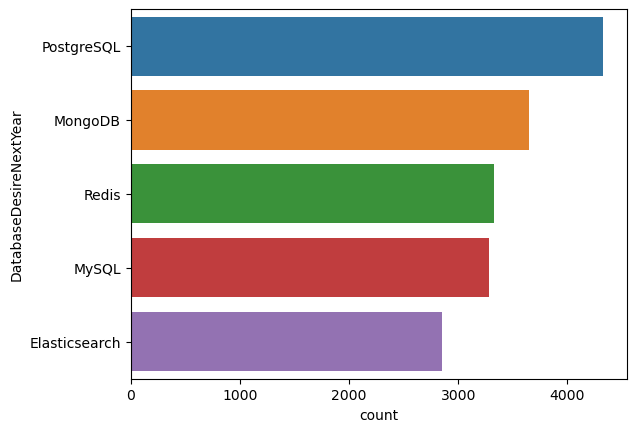

In [14]:
QUERY = """
SELECT DatabaseDesireNextYear, Count(Respondent) as count FROM DatabaseDesireNextYear GROUP BY DatabaseDesireNextYear ORDER BY count DESC LIMIT 5
"""
df = pd.read_sql_query(QUERY,conn)
plot = sns.barplot(x='count', y='DatabaseDesireNextYear', data=df, orient='h')

In [29]:
QUERY = """
SELECT DatabaseDesireNextYear, Count(Respondent) as count FROM DatabaseDesireNextYear GROUP BY DatabaseDesireNextYear ORDER BY count
"""
pd.read_sql_query(QUERY,conn)

,DatabaseDesireNextYear,count
0,Couchbase,390
1,Other(s):,645
2,Oracle,870
3,Cassandra,1003
4,DynamoDB,1044
5,MariaDB,1385
6,Firebase,1650
7,SQLite,2437
8,Microsoft SQL Server,2706
9,Elasticsearch,2856


In [ ]:
conn.close()